In [200]:
import warnings
warnings.filterwarnings('ignore')

# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# seaborn
import seaborn as sns
# user defined utils
import sys  
sys.path.insert(0,'D:\Pythons\Jupyter_Projects')
import utils

In [201]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Loading the  diamonds.csv dataset 


In [202]:
df = pd.read_csv('./datasets/diamonds-m.csv')

# Exploratory Data Analytics

In [203]:
# columns
print("\n*** Columns ***")
df.columns


*** Columns ***


Index(['id', 'carat', 'cut', 'color', 'clarity', 'popularity', 'depth',
       'table', 'price', 'x', 'y', 'z'],
      dtype='object')

In [204]:
# info
print("\n*** Structure ***")
df.info()


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53940 non-null  int64  
 1   carat       53938 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53937 non-null  object 
 4   clarity     53940 non-null  object 
 5   popularity  53930 non-null  object 
 6   depth       53940 non-null  float64
 7   table       53940 non-null  float64
 8   price       53936 non-null  float64
 9   x           53940 non-null  float64
 10  y           53940 non-null  float64
 11  z           53940 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.9+ MB


In [205]:
# summary
print("\n*** Summary ***")
df.describe()


*** Summary ***


,id,carat,depth,table,price,x,y,z
count,53940.000000,53938.000000,53940.000000,53940.000000,53936.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797947,61.749405,57.457184,3932.833822,5.731157,5.734526,3.538734
std,15571.281097,0.474018,1.432621,2.234491,3989.443555,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [206]:
# head
print("\n*** Head ***")
df.head()


*** Head ***


,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,Good,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,Good,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,Fair,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,Poor,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,Good,63.3,58.0,335.0,4.34,4.35,2.75


# Transformation / Data Cleaning


# the cut column
first we are converting alpha to numeric data type for the ease of calculations<br>
converting via ***'map'***<br>
map can handle errors easily

In [207]:
print("\n*** Cut ***")
colName = 'cut'  
# original data
print("*Original Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("Class Count")
df.groupby([colName])['id'].count()


*** Cut ***
*Original Count*
Null Values:  0
Zero Values:  0
Class Count


cut
Fair          1610
Good          4906
Ideal        21548
Premium      13791
Unknown          3
Very Good    12082
Name: id, dtype: int64

In [208]:
# cleaning data
print("*Categoric Data*")
print(df[colName].unique())
#assigning -1 for unknown values
df[colName] = df[colName].map({"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4, "Unknown":-1})

*Categoric Data*
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Unknown']


In [209]:
# cleaned data
print("*Cleaned Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("*Categoric Data*")
print(df[colName].unique())
print("Class Count")
df.groupby([colName])['id'].count()

*Cleaned Count*
Null Values:  0
Zero Values:  1610
*Categoric Data*
[ 4  3  1  2  0 -1]
Class Count


cut
-1        3
 0     1610
 1     4906
 2    12082
 3    13791
 4    21548
Name: id, dtype: int64

# check color
 convert alpha to numeric via ***cat codes***
<br> cat code can handle nulls but not errors

In [210]:
print("\n*** Color ***")
colName = 'color'  
print("*Original Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("Categoric data\n",df[colName].unique())
print("Class Count")
print(df.groupby([colName])['id'].count())


*** Color ***
*Original Count*
Null Values:  3
Zero Values:  0
Categoric data
 ['E' 'I' 'J' 'H' 'F' 'G' 'D' nan]
Class Count
color
D     6775
E     9797
F     9542
G    11292
H     8303
I     5421
J     2807
Name: id, dtype: int64


In [211]:
# clean data
print("*Categoric Data*")
print(df[colName].unique())
df[colName] = pd.Categorical(df[colName])
df[colName] = df[colName].cat.codes
print("Transformed into numeric values\n",df[colName].unique())

*Categoric Data*
['E' 'I' 'J' 'H' 'F' 'G' 'D' nan]
Transformed into numeric values
 [ 1  5  6  4  2  3  0 -1]


In [212]:
# cleaned data
print("*Cleaned Count*")
print("Null Values: ", df[colName].isnull().sum())
#here zero values doesn't mean invalid, it shows the actual value of F which is a categorical variable
print("Zero Values: ", (df[colName]==0).sum())
print("Class Count")
print(df.groupby([colName])['id'].count())

*Cleaned Count*
Null Values:  0
Zero Values:  6775
Class Count
color
-1        3
 0     6775
 1     9797
 2     9542
 3    11292
 4     8303
 5     5421
 6     2807
Name: id, dtype: int64


# check clarity
 convert alpha to numeric via ***label encoder***
 <br>it can't handle nulls & erros ...it needs requires valid data only

In [213]:
print("\n*** Clarity ***")
colName = 'clarity'
print("*Original Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("Class Count")
print(df.groupby([colName])['id'].count())


*** Clarity ***
*Original Count*
Null Values:  0
Zero Values:  0
Class Count
clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8172
VS2     12258
VVS1     3654
VVS2     5066
Name: id, dtype: int64


In [214]:
# clean data
print("*Categoric Data*")
print(df[colName].unique())
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[colName] = le.fit_transform(df[colName])
print(df[colName].unique())

*Categoric Data*
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'I1' 'VVS1' 'IF']
[3 2 4 5 7 0 6 1]


In [215]:
# cleaned data
print("*Cleaned Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("Class Count")
print(df.groupby([colName])['id'].count())

*Cleaned Count*
Null Values:  0
Zero Values:  741
Class Count
clarity
0      741
1     1790
2    13065
3     9194
4     8172
5    12258
6     3654
7     5066
Name: id, dtype: int64


# check popularity
 convert alpha to numeric via cat codes
 <br>handle errors & nulls

In [216]:
print("\n***Popularity ***")
colName = 'popularity'  
print("*Original Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("Class Count")
print(df.groupby([colName])['id'].count())
print("*Categoric Data*")
print(df[colName].unique())


***Popularity ***
*Original Count*
Null Values:  10
Zero Values:  0
Class Count
popularity
Fair         8425
Good        24261
NotAvail       13
Poor        21231
Name: id, dtype: int64
*Categoric Data*
['Good' 'Fair' 'Poor' nan 'NotAvail']


In [217]:
# clean data
#here Notavail and non means the same to we just make the change as below
df[colName] = np.where(df[colName] == "NotAvail", None, df[colName])
df[colName] = pd.Categorical(df[colName])
df[colName] = df[colName].cat.codes
print("*Categoric Data*")
print(df[colName].unique())

*Categoric Data*
[ 1  0  2 -1]


In [218]:
# cleaned data
print("*Cleaned Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())
print("Class Count")
print(df.groupby([colName])['id'].count())

*Cleaned Count*
Null Values:  0
Zero Values:  8425
Class Count
popularity
-1       23
 0     8425
 1    24261
 2    21231
Name: id, dtype: int64


In [219]:
# dropping columns
# all id, names, descriptions to be dropped
print("\n*** Drop Cols ***")
df = df.drop('id', axis=1)
print("Done ...")


*** Drop Cols ***
Done ...


# check outlier count

In [220]:
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))


*** Outlier Count ***
carat             0
cut               0
color             0
clarity           0
popularity        0
depth             278
table             28
price             0
x                 0
y                 2
z                 2



as we can see columns; dephth, table, y and z  are having 278 and 28, 2, 2 outliers respectively
<br>for depth and table since the outlier values are in a huge range we cosider it as valid values
<br>but for y and z we may need to do some modification as per the requirement

In [223]:
# check outlier index
print('\n*** Outlier Index ***')
utils.OutlierIndex(df)


*** Outlier Index ***


'carat \n[] \ncut \n[] \ncolor \n[] \nclarity \n[] \npopularity \n[] \ndepth \n[[   91   204   227   298   352   385   423   440   443   712   713   714\n    719   777   801   839   895   899   938  1227  1238  1438  1608  1811\n   2015  2112  2212  2356  2366  2446  2504  2583  2698  2873  2913  2981\n   3446  4273  4307  4325  4326  4505  4518  4601  4695  4779  4970  4971\n   5014  5139  5446  5460  5462  5575  5845  5869  6020  6341  6502  6812\n   6970  7022  7674  7699  7737  7773  7900  8009  8014  8186  8356  8392\n   8575  8672  9281  9676  9734  9784  9949  9982 10377 10464 10593 10760\n  10961 11241 11757 11778 11827 12131 12423 12618 12645 13002 13221 13270\n  13922 13991 13992 14113 14138 14504 14645 14881 14999 15503 15781 15849\n  15865 16256 16408 16439 16504 16637 16857 17097 17181 17196 17222 17481\n  17593 17691 17717 17719 17956 18024 18072 18357 18358 18461 18544 18815\n  19346 19502 19785 19792 20102 20337 20441 20647 20877 21448 21711 21712\n  22460 22572 22741 2

In [226]:
# check outlier values
print('\n*** Outlier Values ***')
utils.OutlierValues(df)


*** Outlier Values ***
Column:  carat
[]
 
Column:  cut
[]
 
Column:  color
[]
 
Column:  clarity
[]
 
Column:  popularity
[]
 
Column:  depth
[55.1 67.9 55.1 67.4 67.3 68.1 55.  56.  53.1 53.3 53.  67.8 67.9 55.8
 67.6 68.2 67.7 69.5 56.3 56.  67.1 69.3 55.4 68.1 55.9 68.2 68.3 68.5
 69.3 56.2 56.3 56.1 56.2 67.6 68.4 69.7 68.7 68.6 71.6 68.7 67.3 67.7
 43.  68.8 67.1 67.4 67.8 67.5 67.7 69.  55.2 68.2 68.9 69.6 56.4 56.
 68.3 44.  56.4 55.2 56.3 67.8 56.4 67.2 55.9 68.8 68.3 67.1 70.1 71.3
 70.6 69.8 69.8 71.8 67.5 69.7 68.4 67.6 55.9 69.7 43.  53.8 56.3 69.5
 55.9 53.2 56.3 70.  67.3 55.9 68.5 68.9 68.9 69.4 55.8 67.6 67.8 67.4
 55.9 56.3 67.6 68.  69.8 67.3 69.  68.1 70.2 68.  68.  67.7 68.5 70.1
 67.4 67.7 50.8 55.6 70.5 68.2 68.  67.6 55.9 68.6 71.  68.4 67.4 55.6
 56.1 67.2 68.8 55.8 69.6 56.3 67.1 67.3 68.3 56.2 67.1 69.1 56.  56.3
 67.5 68.7 67.1 68.3 67.7 55.2 56.1 67.9 55.3 56.2 67.1 56.2 67.4 56.3
 67.2 70.2 56.2 67.7 67.5 67.6 70.6 55.2 67.6 56.3 68.6 55.3 54.2 67.9
 68.6

'carat \n[] \ncut \n[] \ncolor \n[] \nclarity \n[] \npopularity \n[] \ndepth \n[55.1 67.9 55.1 67.4 67.3 68.1 55.  56.  53.1 53.3 53.  67.8 67.9 55.8\n 67.6 68.2 67.7 69.5 56.3 56.  67.1 69.3 55.4 68.1 55.9 68.2 68.3 68.5\n 69.3 56.2 56.3 56.1 56.2 67.6 68.4 69.7 68.7 68.6 71.6 68.7 67.3 67.7\n 43.  68.8 67.1 67.4 67.8 67.5 67.7 69.  55.2 68.2 68.9 69.6 56.4 56.\n 68.3 44.  56.4 55.2 56.3 67.8 56.4 67.2 55.9 68.8 68.3 67.1 70.1 71.3\n 70.6 69.8 69.8 71.8 67.5 69.7 68.4 67.6 55.9 69.7 43.  53.8 56.3 69.5\n 55.9 53.2 56.3 70.  67.3 55.9 68.5 68.9 68.9 69.4 55.8 67.6 67.8 67.4\n 55.9 56.3 67.6 68.  69.8 67.3 69.  68.1 70.2 68.  68.  67.7 68.5 70.1\n 67.4 67.7 50.8 55.6 70.5 68.2 68.  67.6 55.9 68.6 71.  68.4 67.4 55.6\n 56.1 67.2 68.8 55.8 69.6 56.3 67.1 67.3 68.3 56.2 67.1 69.1 56.  56.3\n 67.5 68.7 67.1 68.3 67.7 55.2 56.1 67.9 55.3 56.2 67.1 56.2 67.4 56.3\n 67.2 70.2 56.2 67.7 67.5 67.6 70.6 55.2 67.6 56.3 68.6 55.3 54.2 67.9\n 68.6 56.2 55.2 51.  67.3 67.3 56.  56.3 68.3 70.8 56.4 54

In [228]:
# check variance
print('\n*** Variance In Columns ***')
df.var()


*** Variance In Columns ***


carat         2.246935e-01
cut           1.247576e+00
color         2.894117e+00
clarity       2.974128e+00
popularity    4.955506e-01
depth         2.052404e+00
table         4.992948e+00
price         1.591566e+07
x             1.258347e+00
y             1.304472e+00
z             4.980109e-01
dtype: float64

In [231]:
# check std dev 
print('\n*** StdDev In Columns ***')
df.std()


*** StdDev In Columns ***


carat            0.474018
cut              1.116950
color            1.701210
clarity          1.724566
popularity       0.703954
depth            1.432621
table            2.234491
price         3989.443555
x                1.121761
y                1.142135
z                0.705699
dtype: float64

In [233]:
# check mean
print('\n*** Mean In Columns ***')
df.mean()


*** Mean In Columns ***


carat            0.797947
cut              2.903819
color            2.593864
clarity          3.835113
popularity       1.236559
depth           61.749405
table           57.457184
price         3932.833822
x                5.731157
y                5.734526
z                3.538734
dtype: float64

In [236]:
# check zeros
print('\n*** Columns With Zeros ***')
(df==0).sum()


*** Columns With Zeros ***


carat            0
cut           1610
color         6775
clarity        741
popularity    8425
depth            0
table            0
price            0
x                8
y                7
z               20
dtype: int64

In [237]:
# check X
print("\n*** Feature x ***")
colName = 'x'
print("*Original Count*")
print("Zero Values: ", (df[colName]==0).sum())
df[colName] = np.where(df[colName]==0, df[colName].mean(), df[colName])
print("*Cleaned Count*")
print("Zero Values: ", (df[colName]==0).sum())


*** Feature x ***
*Original Count*
Zero Values:  8
*Cleaned Count*
Zero Values:  0


In [238]:
# check y
print("\n*** Feature y ***")
colName = 'y'
print("*Original Count*")
print("Zero Values: ", (df[colName]==0).sum())
df[colName] = np.where(df[colName]==0, df[colName].mean(), df[colName])
print("*Cleaned Count*")
print("Zero Values: ", (df[colName]==0).sum())


*** Feature y ***
*Original Count*
Zero Values:  7
*Cleaned Count*
Zero Values:  0


In [239]:
# check z
print("\n*** Feature z ***")
colName = 'z'
print("*Original Count*")
print("Zero Values: ", (df[colName]==0).sum())
df[colName] = np.where(df[colName]==0, df[colName].mean(), df[colName])
print("*Cleaned Count*")
print("Zero Values: ", (df[colName]==0).sum())


*** Feature z ***
*Original Count*
Zero Values:  20
*Cleaned Count*
Zero Values:  0


In [240]:
# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 


*** Columns With Nulls ***
carat         2
cut           0
color         0
clarity       0
popularity    0
depth         0
table         0
price         4
x             0
y             0
z             0
dtype: int64


In [241]:
# check Carat
# handle nulls if required
print("\n*** Carat ***")
colName = 'carat'
print("*Original Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())


*** Carat ***
*Original Count*
Null Values:  2
Zero Values:  0


In [242]:
# handle nulls
print("Basic Stats")
print("Mean:   ",df[colName].mean())
print("Median: ",df[colName].median())
print("Mode:   ",df[colName].mode())

Basic Stats
Mean:    0.7979465312024756
Median:  0.7
Mode:    0    0.3
dtype: float64


In [243]:
# assign lower of mean & median
df[colName] = df[colName].fillna(df[colName].median())
# clean counts
print("*Cleaned Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())

*Cleaned Count*
Null Values:  0
Zero Values:  0


In [244]:
# check Price
print("\n*** Price ***")
colName = 'price'
print("*Original Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())


*** Price ***
*Original Count*
Null Values:  4
Zero Values:  0


In [245]:
# handling nulls, by replacing them with mean or median
print("Mean:   ",df[colName].mean())
print("Median: ",df[colName].median())
print("Mode:   ",df[colName].mode())

Mean:    3932.8338215663007
Median:  2401.0
Mode:    0    605.0
dtype: float64


In [248]:
# assign lower of mean & median
df[colName] = df[colName].fillna(df[colName].median())
# clean counts
print("*Cleaned Count*")
print("Null Values: ", df[colName].isnull().sum())
print("Zero Values: ", (df[colName]==0).sum())

*Cleaned Count*
Null Values:  0
Zero Values:  0


# some validations

In [249]:
# computed depth percentage
# computed depth
df['comp_depth'] = df['z'] / ((df['x']+df['y'])/2)*100
# difference between depth & computed depth
df['depth_diff'] = abs(df['depth']-df['comp_depth'])
# percentage difference between depth & computed depth
df['depth_diff_per'] = (df['depth_diff']/df['depth'])*100
# print
print("\n*** Depth Percentage Difference ***")
# count
print('*Count*')
print(df [ df['depth_diff_per'] >= 5 ]['depth_diff_per'].count())
# values
print('*Values*')
print(df [ df['depth_diff_per'] >= 5 ]['depth_diff_per'])


*** Depth Percentage Difference ***
*Count*
52
*Values*
2207       8.093550
2274       8.910059
2314       8.133276
2941      18.399714
4518      46.664943
4687       8.219355
4791      13.384152
5471       7.824351
6341      49.221297
10167     22.068055
10377     46.504516
11182      6.977175
13601     12.799550
14029      7.748991
14344      7.748991
14635     73.428494
15235     11.748716
15951      7.351992
17531      7.036168
17593     16.252528
19502     15.435714
20694     66.889101
21654     68.026160
21969      5.153926
23194      5.954334
24067     59.145513
24394     29.663940
25849     32.729351
26123     31.844014
26194     19.392802
26495     31.844763
27112     31.122755
27503     29.318553
27646      5.571294
27739     37.503046
33102     17.733944
34282     37.794909
38734     10.555507
39246     27.953261
47138     30.731933
47919      5.246359
48410    902.070315
48832      8.742727
49189     55.156754
49875      9.551942
49905     58.079305
49915      5.569808
515

In [250]:
##############################################################
# Visual Data Analytics
##############################################################

# store dependent variable  
# change as required
depVars = "price"
print(depVars)
print("Done ...")

price
Done ...


In [251]:
# check relation with corelation - table
print("\n*** Correlation Table ***")
pd.options.display.float_format = '{:,.2f}'.format
print(df.corr())


*** Correlation Table ***
                carat   cut  color  clarity  popularity  depth  table  price  \
carat            1.00 -0.13   0.29    -0.21       -0.12   0.03   0.18   0.92   
cut             -0.13  1.00  -0.02     0.12        0.05  -0.22  -0.43  -0.05   
color            0.29 -0.02   1.00    -0.03       -0.06   0.05   0.03   0.17   
clarity         -0.21  0.12  -0.03     1.00        0.57  -0.05  -0.09  -0.07   
popularity      -0.12  0.05  -0.06     0.57        1.00  -0.01  -0.04  -0.06   
depth            0.03 -0.22   0.05    -0.05       -0.01   1.00  -0.30  -0.01   
table            0.18 -0.43   0.03    -0.09       -0.04  -0.30   1.00   0.13   
price            0.92 -0.05   0.17    -0.07       -0.06  -0.01   0.13   1.00   
x                0.98 -0.13   0.27    -0.23       -0.13  -0.03   0.20   0.89   
y                0.95 -0.12   0.26    -0.22       -0.12  -0.03   0.18   0.87   
z                0.96 -0.15   0.27    -0.23       -0.13   0.09   0.15   0.87   
comp_depth   


*** Heat Map ***


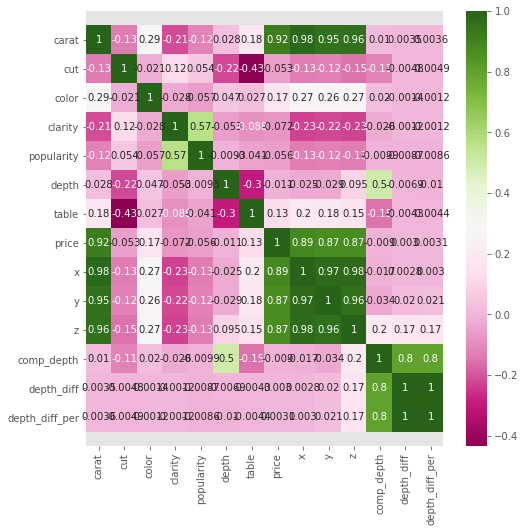

In [252]:
# check relation with corelation - heatmap
print("\n*** Heat Map ***")
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()


*** Boxplot ***


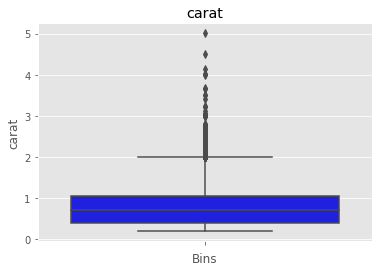

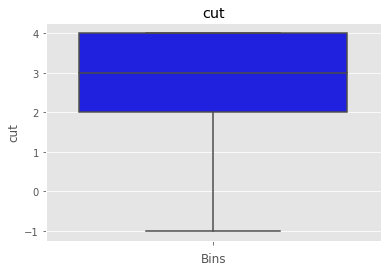

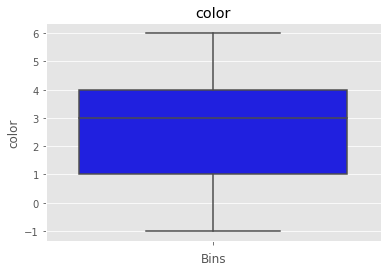

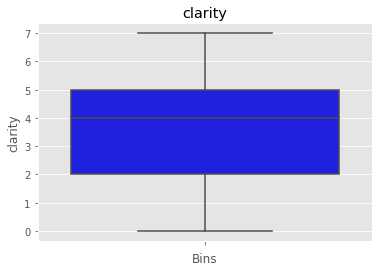

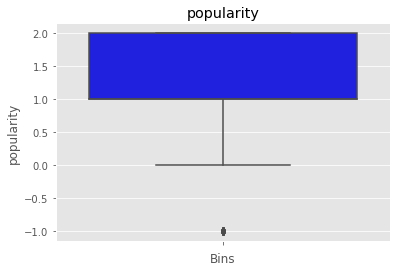

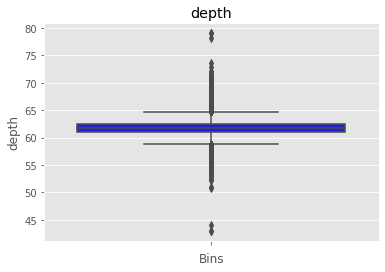

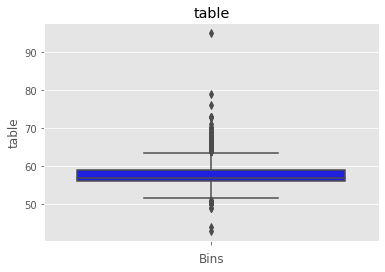

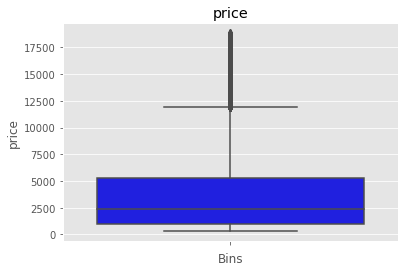

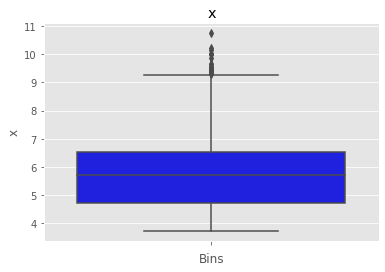

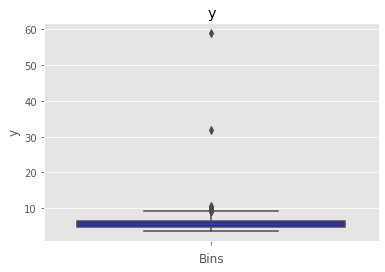

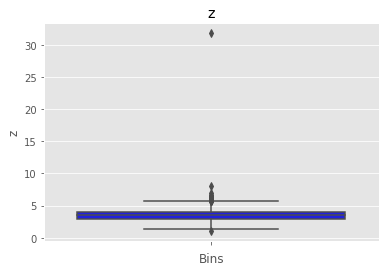

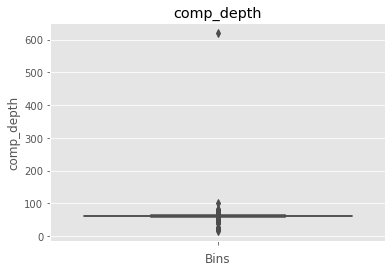

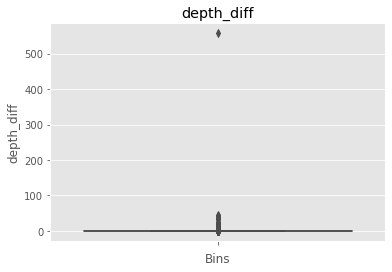

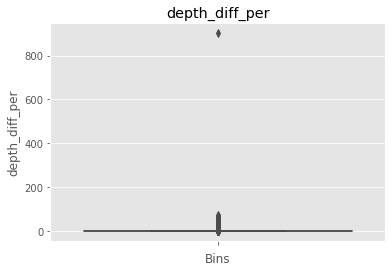

In [253]:
# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    if df[colName].dtype == "object": 
        continue
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()


*** Histograms ***


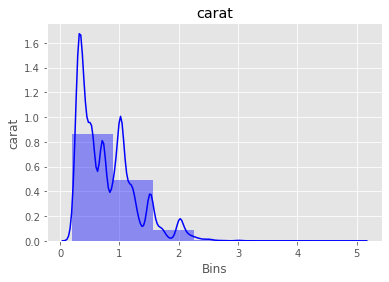

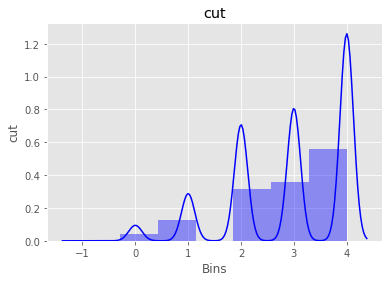

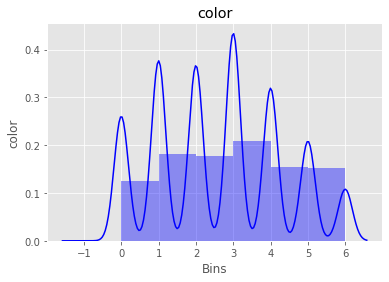

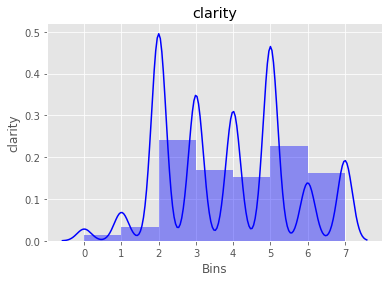

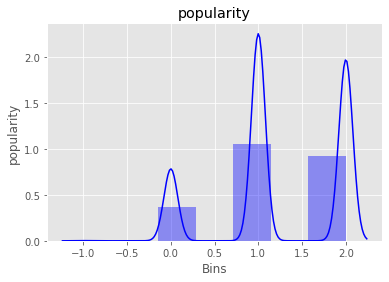

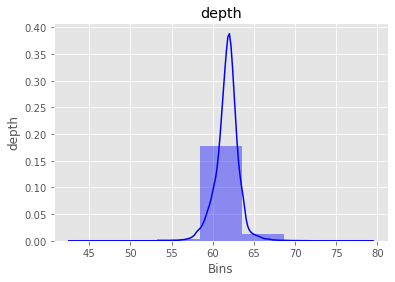

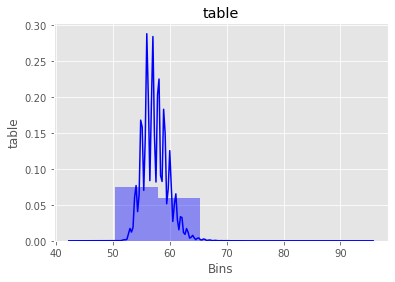

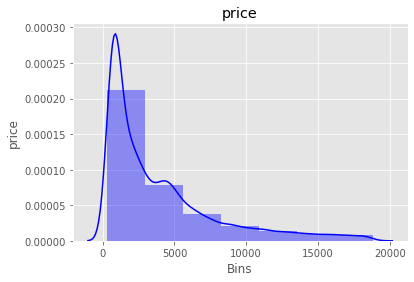

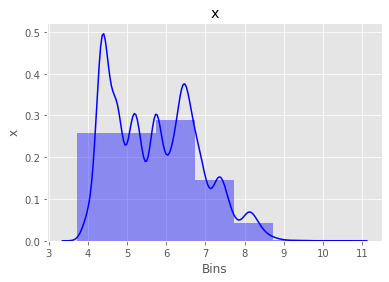

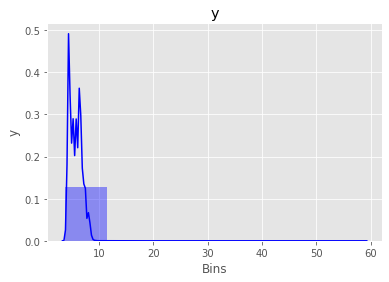

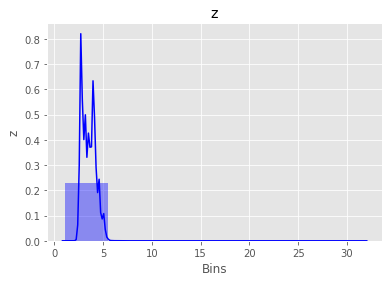

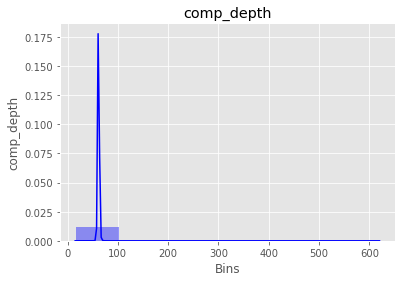

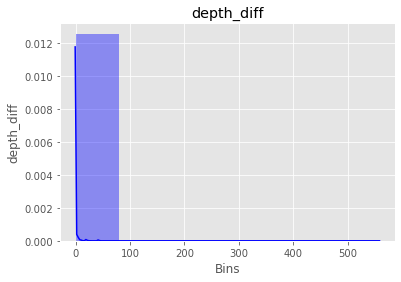

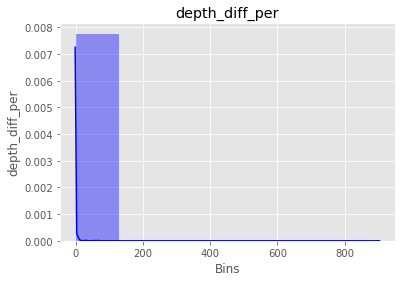

In [261]:
# histograms
print('\n*** Histograms ***')
colNames = df.columns.tolist()
for colName in colNames:
    if df[colName].dtype == "object": 
        continue
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=True, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()


*** Scatterplot ***
depth_diff_per


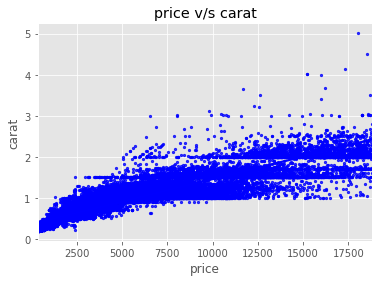

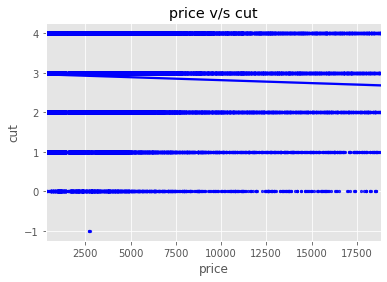

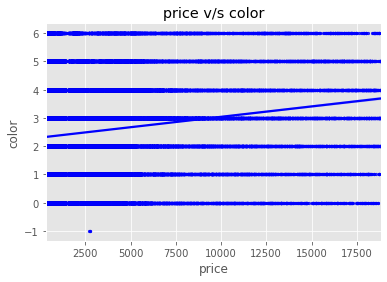

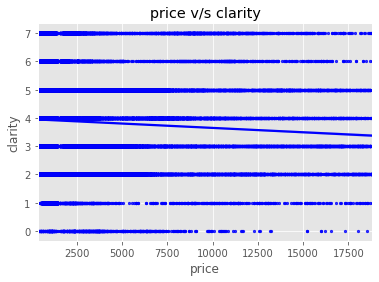

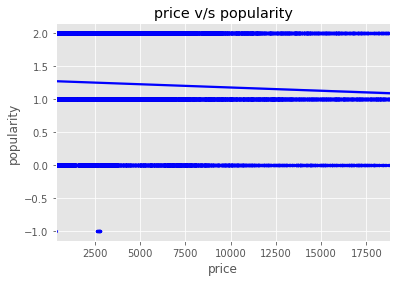

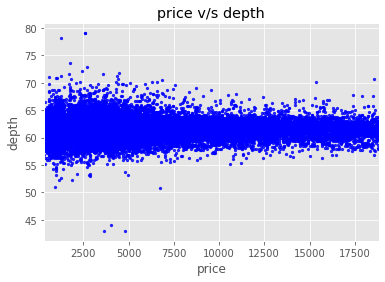

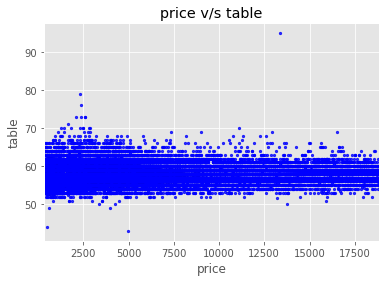

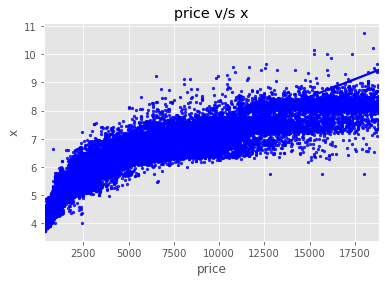

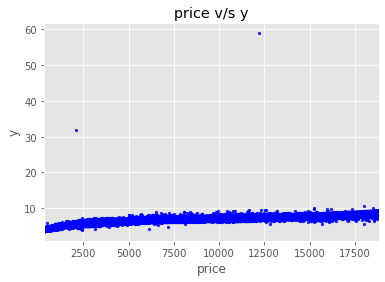

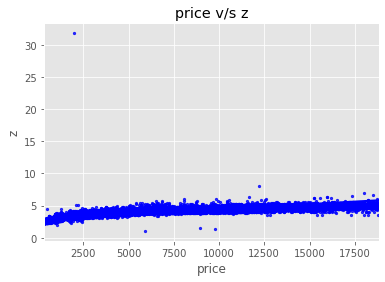

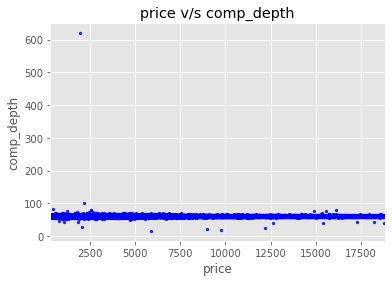

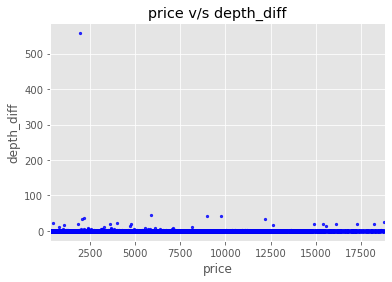

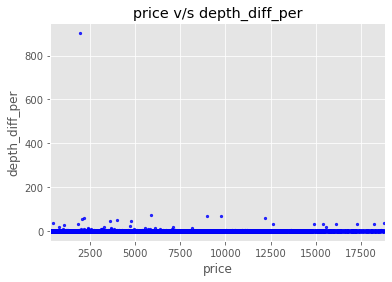

In [262]:
# scatterplots
print('\n*** Scatterplot ***')
colNames = df.columns.tolist()
colNames.remove(depVars)
print(colName)
for colName in colNames:
    if df[colName].dtype == "object": 
        continue
    colValues = df[colName].values
    plt.figure()
    sns.regplot(data=df, x=depVars, y=colName, color= 'b', scatter_kws={"s": 5})
    plt.title(depVars + ' v/s ' + colName)
    plt.show()


*** Distribution Plot ***
['cut', 'color', 'clarity']

*cut*
cut
-1        3
 0     1610
 1     4906
 2    12082
 3    13791
 4    21548
dtype: int64



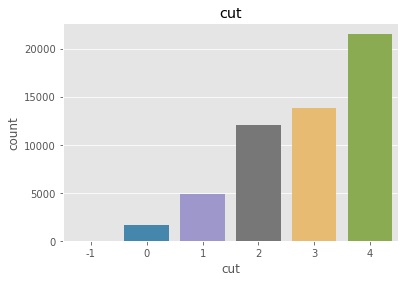


*color*
color
-1        3
 0     6775
 1     9797
 2     9542
 3    11292
 4     8303
 5     5421
 6     2807
dtype: int64



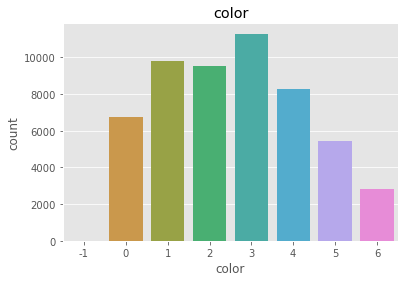


*clarity*
clarity
0      741
1     1790
2    13065
3     9194
4     8172
5    12258
6     3654
7     5066
dtype: int64



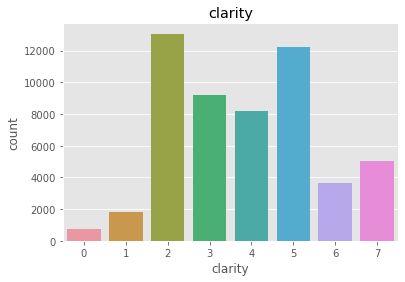

In [265]:
# class count plot to see for each categoy
print("\n*** Distribution Plot ***")
# creating list of class varibable manually
colNames = ['cut', 'color', 'clarity']
print(colNames)
for colName in colNames:
    print("\n*"+colName+"*")
    print(df.groupby(colName).size())
    print("")
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()